In [1]:
import pandas as pd
from directories_constants import RESULTS_EXCEL

In [41]:
bioelectra_averagef1 = pd.read_excel(RESULTS_EXCEL, sheet_name="bioelectra")
pubmedbert_averagef1 = pd.read_excel(RESULTS_EXCEL, sheet_name="pubmedbert")
biolinkbert_averagef1 = pd.read_excel(RESULTS_EXCEL, sheet_name="biolinkbert")
clinical_longformer_averagef1 = pd.read_excel(RESULTS_EXCEL, sheet_name="clinical longformer")

### FUNCTIONS

In [4]:
def get_max_list(df):# gets the columns and the maximum average f1 score in the pd.series
    columns = df.columns
    columns = list(set(columns) - {"learning rate", "epoch"})
    max_values = []
    for column in columns: 
        temp = df[column].max()
        max_values.append(temp)
    return columns, max_values

def get_lr_df(df):
    abs_list= []
    absmeth_list = []
    absmeth50_list = []
    absmeth512_list = [] 

    for lr in learning_rates: 
        x = df[df["learning rate"]==lr]

        col,values = get_max_list(x)

        absmeth512_list.append(values[0])
        absmeth50_list.append(values[1])
        abs_list.append(values[2])
        absmeth_list.append(values[3])

    temp_dict = {
        "lr": learning_rates,
        col[0]:absmeth512_list,
        col[1]:absmeth50_list,
        col[2]:abs_list,
        col[3]:absmeth_list
    }

    return pd.DataFrame.from_dict(temp_dict)

### INFERENCE

#### BioElectra

In [5]:
bioelectra_averagef1

,learning rate,epoch,abstract,abstract + method,50 abstract + method,512 abstract + mthod
0,1.000000e-07,1,-1.0,-1.0,0.026769,-1.0
1,1.000000e-07,2,-1.0,-1.0,0.028824,-1.0
2,1.000000e-07,3,-1.0,-1.0,0.030015,-1.0
3,1.000000e-07,4,-1.0,-1.0,0.030118,-1.0
4,1.000000e-07,5,-1.0,-1.0,0.030594,-1.0
...,...,...,...,...,...,...
112,7.500000e-04,4,-1.0,-1.0,-1.000000,-1.0
113,7.500000e-04,5,-1.0,-1.0,-1.000000,-1.0
114,7.500000e-04,6,-1.0,-1.0,-1.000000,-1.0
115,7.500000e-04,7,-1.0,-1.0,-1.000000,-1.0


<div class="alert alert-block alert-warning ">  
<b>Note:</b> "-1" means their is no training record forthe learning rate and "0" means the f1score was zero
</div>

In [6]:
columns1, bioelectra_max = get_max_list(bioelectra_averagef1)

In [26]:
for value1 , value2 in zip(columns1, bioelectra_max):
    print(value1, value2)

abstract + method 0.4881521538461539
50 abstract + method 0.6004170714285715
abstract 0.3302597692307693
512 abstract + mthod 0.47456507142857146


Text(0.5, 1.0, 'Max F1score of several trainings on Bioelectra')

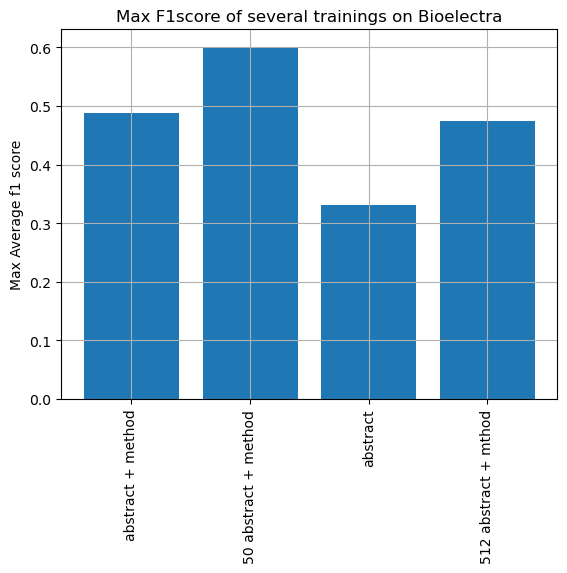

In [7]:
import matplotlib.pyplot as plt

plt.bar(columns1, bioelectra_max)
plt.xticks(rotation=90)
plt.grid(visible=True)
plt.ylabel("Max Average f1 score")
plt.title("Max F1score of several trainings on Bioelectra")

<div class="alert alert-block alert-success ">  
<b>Inference:</b> 50 abstract + method has the highest f1score for bioelectra
</div>

In [8]:
learning_rates = bioelectra_averagef1["learning rate"].unique() 
learning_rates.sort()
learning_rates

array([1.00e-07, 7.50e-07, 1.00e-06, 1.25e-06, 2.50e-06, 5.00e-06,
       1.00e-05, 2.50e-05, 3.00e-05, 5.00e-05, 7.50e-05, 8.50e-05,
       1.00e-04, 5.00e-04, 7.50e-04])

In [9]:
bioelectra_lr_df= get_lr_df(bioelectra_averagef1)
bioelectra_lr_df

,lr,abstract + method,50 abstract + method,abstract,512 abstract + mthod
0,1.000000e-07,-1.000000,0.031359,-1.000000,-1.000000
1,7.500000e-07,-1.000000,0.031322,-1.000000,-1.000000
2,1.000000e-06,0.050734,0.299151,-1.000000,-1.000000
3,1.250000e-06,-1.000000,-1.000000,-1.000000,-1.000000
4,2.500000e-06,-1.000000,0.152773,-1.000000,-1.000000
5,5.000000e-06,-1.000000,0.345686,-1.000000,0.039672
6,1.000000e-05,0.411635,-1.000000,0.046499,0.447940
7,2.500000e-05,0.467784,-1.000000,-1.000000,0.422588
8,3.000000e-05,-1.000000,-1.000000,-1.000000,-1.000000
9,5.000000e-05,0.488152,0.600417,0.330123,-1.000000


NameError: name 'biolinkbert_lr_df' is not defined

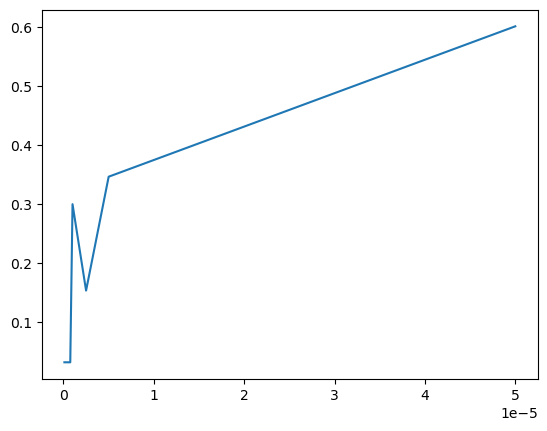

In [10]:
import matplotlib.pyplot as plt
title = "Bioelectra model performance over several learning rate"

plt.plot(bioelectra_lr_df[bioelectra_lr_df["50 abstract + method"]>0]["lr"], 
            bioelectra_lr_df[bioelectra_lr_df["50 abstract + method"]>0]["50 abstract + method"], label = "bioelectra")
plt.plot(biolinkbert_lr_df[biolinkbert_lr_df["50 abstract + method"]>0]["lr"], 
            biolinkbert_lr_df[biolinkbert_lr_df["50 abstract + method"]>0]["50 abstract + method"], label = "biolinkbert")
plt.plot(pubmedbert_lr_df[pubmedbert_lr_df["50 abstract + method"]>0]["lr"], 
            pubmedbert_lr_df[pubmedbert_lr_df["50 abstract + method"]>0]["50 abstract + method"], label = "pubmedbert")
plt.legend()
plt.grid(True)
plt.ylabel("f1 score")
plt.xlabel("Learning rate")
plt.title(title)



In [11]:
bioelectra_lr_df["lr"]

0     1.000000e-07
1     7.500000e-07
2     1.000000e-06
3     1.250000e-06
4     2.500000e-06
5     5.000000e-06
6     1.000000e-05
7     2.500000e-05
8     3.000000e-05
9     5.000000e-05
10    7.500000e-05
11    8.500000e-05
12    1.000000e-04
13    5.000000e-04
14    7.500000e-04
Name: lr, dtype: float64

In [12]:
<div class="alert alert-block alert-success ">  
<b>Note:</b> F1 score increases 
</div>

SyntaxError: invalid syntax (2985282873.py, line 1)

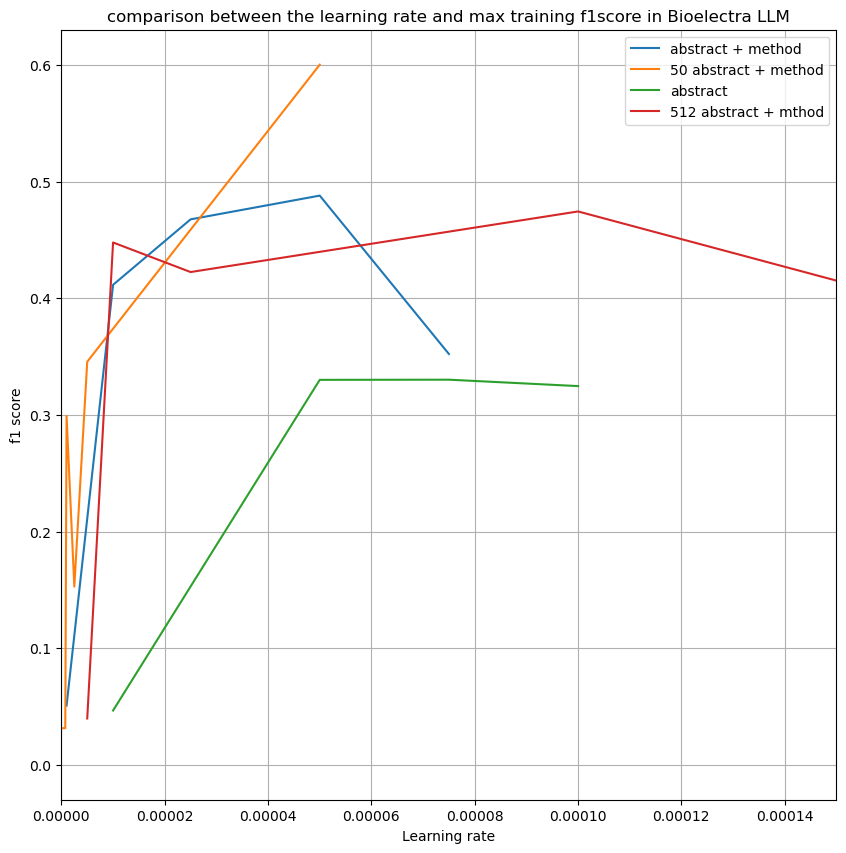

In [13]:
import matplotlib.pyplot as plt
title = "comparison between the learning rate and max training f1score in Bioelectra LLM"
plt.figure(figsize=(10, 10))
x = bioelectra_lr_df[bioelectra_lr_df["abstract + method"]!=-1]["lr"]
plt.plot(bioelectra_lr_df[bioelectra_lr_df["abstract + method"]!=-1]["lr"], 
            bioelectra_lr_df[bioelectra_lr_df["abstract + method"]!=-1]["abstract + method"], label = "abstract + method")
plt.plot(bioelectra_lr_df[bioelectra_lr_df["50 abstract + method"]!=-1]["lr"], 
            bioelectra_lr_df[bioelectra_lr_df["50 abstract + method"]!=-1]["50 abstract + method"], label = "50 abstract + method")

plt.plot(bioelectra_lr_df[bioelectra_lr_df["abstract"]!=-1]["lr"], 
            bioelectra_lr_df[bioelectra_lr_df["abstract"]!=-1]["abstract"], label = "abstract")
plt.plot(bioelectra_lr_df[bioelectra_lr_df["512 abstract + mthod"]!=-1]["lr"], 
            bioelectra_lr_df[bioelectra_lr_df["512 abstract + mthod"]!=-1]["512 abstract + mthod"], label = "512 abstract + mthod")



plt.legend()
plt.grid(True)
plt.ylabel("f1 score")
plt.xlim(0, 0.00015)
plt.xlabel("Learning rate")
plt.title(title)
plt.show()

#### BioLinkBert

In [14]:
biolinkbert_averagef1

,learning rate,epoch,abstract,abstract + method,50 abstract + method,512 abstract + mthod
0,0.000750,1,-1.0,-1.0,-1.0,-1.0
1,0.000750,2,-1.0,-1.0,-1.0,-1.0
2,0.000750,3,-1.0,-1.0,-1.0,-1.0
3,0.000750,4,-1.0,-1.0,-1.0,-1.0
4,0.000750,5,-1.0,-1.0,-1.0,-1.0
...,...,...,...,...,...,...
112,0.000001,1,-1.0,-1.0,-1.0,-1.0
113,0.000001,2,-1.0,-1.0,-1.0,-1.0
114,0.000001,3,-1.0,-1.0,-1.0,-1.0
115,0.000001,4,-1.0,-1.0,-1.0,-1.0


<div class="alert alert-block alert-warning ">  
<b>Note:</b> "-1" means their is no training record forthe learning rate and "0" means the f1score was zero
</div>

In [15]:
columns2, biolinkbert_max = get_max_list(biolinkbert_averagef1)

In [27]:
for value1 , value2 in zip(columns2, biolinkbert_max):
    print(value1, value2)

abstract + method 0.6042886666666666
50 abstract + method 0.5645372142857142
abstract 0.3994317142857143
512 abstract + mthod 0.43481857142857144


Text(0.5, 1.0, 'Max F1score of several trainings on BiolinkBert')

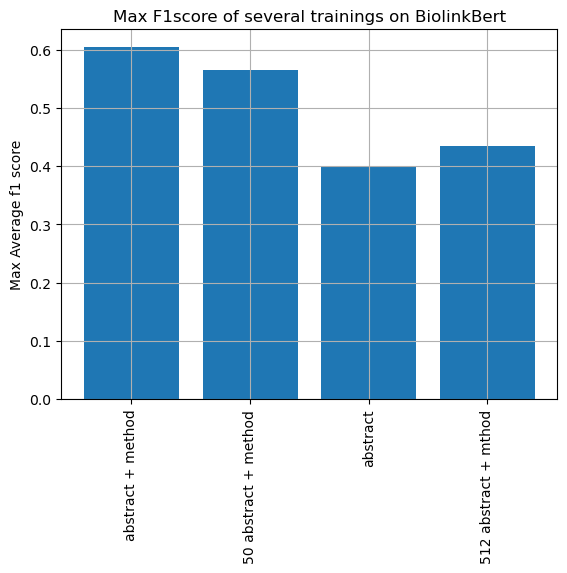

In [16]:
import matplotlib.pyplot as plt

plt.bar(columns2, biolinkbert_max)
plt.xticks(rotation=90)
plt.grid(visible=True)
plt.ylabel("Max Average f1 score")
plt.title("Max F1score of several trainings on BiolinkBert")

<div class="alert alert-block alert-success ">  
<b>Inference:</b> abstract + method has the highest f1score for biolinkbert
</div>

In [17]:
learning_rates = biolinkbert_averagef1["learning rate"].unique() 
learning_rates.sort()
learning_rates

array([1.00e-07, 7.50e-07, 1.00e-06, 1.25e-06, 2.50e-06, 5.00e-06,
       1.00e-05, 2.50e-05, 3.00e-05, 5.00e-05, 7.50e-05, 8.50e-05,
       1.00e-04, 5.00e-04, 7.50e-04])

In [18]:
biolinkbert_lr_df= get_lr_df(biolinkbert_averagef1)
biolinkbert_lr_df

,lr,abstract + method,50 abstract + method,abstract,512 abstract + mthod
0,1.000000e-07,-1.000000,-1.000000,-1.000000,-1.000000
1,7.500000e-07,-1.000000,-1.000000,-1.000000,-1.000000
2,1.000000e-06,-1.000000,0.086244,-1.000000,-1.000000
3,1.250000e-06,-1.000000,-1.000000,-1.000000,-1.000000
4,2.500000e-06,-1.000000,-1.000000,-1.000000,-1.000000
5,5.000000e-06,-1.000000,0.380180,-1.000000,-1.000000
6,1.000000e-05,0.451316,-1.000000,-1.000000,0.387581
7,2.500000e-05,0.000000,-1.000000,-1.000000,-1.000000
8,3.000000e-05,-1.000000,-1.000000,-1.000000,0.434819
9,5.000000e-05,0.604289,0.564537,0.399432,-1.000000


In [19]:
biolinkbert_lr_df["lr"]

0     1.000000e-07
1     7.500000e-07
2     1.000000e-06
3     1.250000e-06
4     2.500000e-06
5     5.000000e-06
6     1.000000e-05
7     2.500000e-05
8     3.000000e-05
9     5.000000e-05
10    7.500000e-05
11    8.500000e-05
12    1.000000e-04
13    5.000000e-04
14    7.500000e-04
Name: lr, dtype: float64

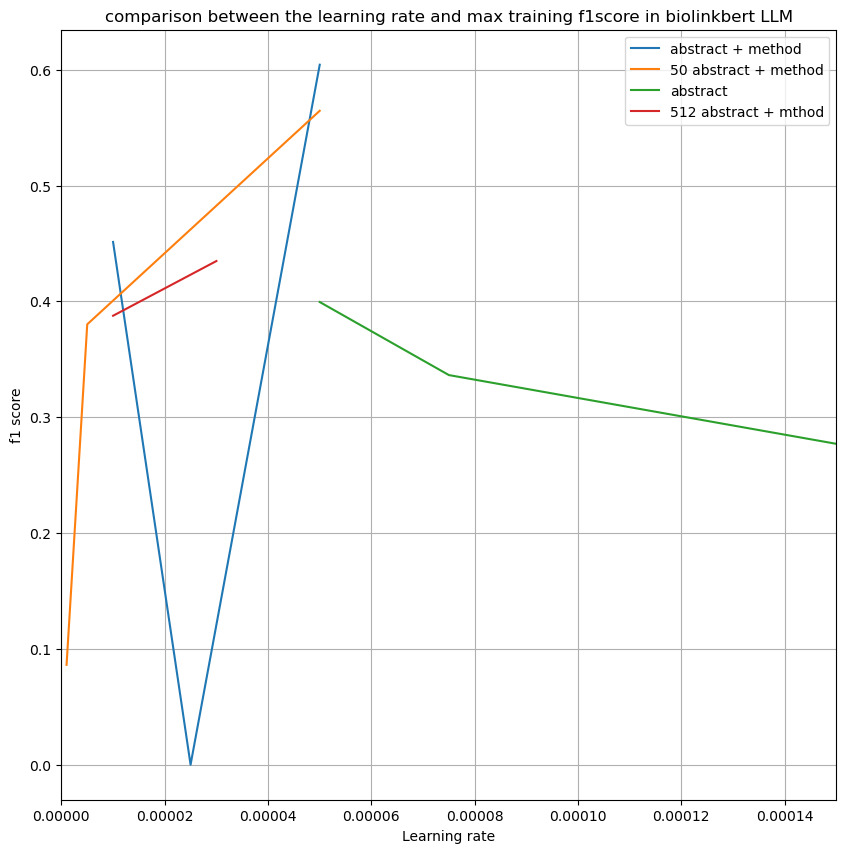

In [20]:
import matplotlib.pyplot as plt
title = "comparison between the learning rate and max training f1score in biolinkbert LLM"
plt.figure(figsize=(10, 10))
x = biolinkbert_lr_df[biolinkbert_lr_df["abstract + method"]!=-1]["lr"]
plt.plot(biolinkbert_lr_df[biolinkbert_lr_df["abstract + method"]!=-1]["lr"], 
            biolinkbert_lr_df[biolinkbert_lr_df["abstract + method"]!=-1]["abstract + method"], label = "abstract + method")
plt.plot(biolinkbert_lr_df[biolinkbert_lr_df["50 abstract + method"]!=-1]["lr"], 
            biolinkbert_lr_df[biolinkbert_lr_df["50 abstract + method"]!=-1]["50 abstract + method"], label = "50 abstract + method")

plt.plot(biolinkbert_lr_df[biolinkbert_lr_df["abstract"]!=-1]["lr"], 
            biolinkbert_lr_df[biolinkbert_lr_df["abstract"]!=-1]["abstract"], label = "abstract")
plt.plot(biolinkbert_lr_df[biolinkbert_lr_df["512 abstract + mthod"]!=-1]["lr"], 
            biolinkbert_lr_df[biolinkbert_lr_df["512 abstract + mthod"]!=-1]["512 abstract + mthod"], label = "512 abstract + mthod")



plt.legend()
plt.grid(True)
plt.ylabel("f1 score")
plt.xlim(0, 0.00015)
plt.xlabel("Learning rate")
plt.title(title)
plt.show()

In [21]:
<div class="alert alert-block alert-success ">  
<b>Inference:</b> abstract + method has the highest f1score for biolinkbert
</div>

SyntaxError: invalid syntax (1525000335.py, line 1)

#### PubMedBert

In [42]:
pubmedbert_averagef1

,learning rate,epoch,abstract,abstract + method,50 abstract + method,512 abstract + mthod
0,0.000750,1,0.036637,-1.0,-1.0,-1.0
1,0.000750,2,0.237802,-1.0,-1.0,-1.0
2,0.000750,3,0.259309,-1.0,-1.0,-1.0
3,0.000750,4,0.323820,-1.0,-1.0,-1.0
4,0.000750,5,0.316855,-1.0,-1.0,-1.0
...,...,...,...,...,...,...
112,0.000001,1,-1.000000,-1.0,-1.0,-1.0
113,0.000001,2,-1.000000,-1.0,-1.0,-1.0
114,0.000001,3,-1.000000,-1.0,-1.0,-1.0
115,0.000001,4,-1.000000,-1.0,-1.0,-1.0


<div class="alert alert-block alert-warning ">  
<b>Note:</b> "-1" means their is no training record forthe learning rate and "0" means the f1score was zero
</div>

In [43]:
columns3, pubmedbert_max = get_max_list(pubmedbert_averagef1)

In [44]:
for value1 , value2 in zip(columns3, pubmedbert_max):
    print(value1, value2)

abstract + method 0.6147844166666666
50 abstract + method 0.639104857142857
abstract 0.4420143571428571
512 abstract + mthod 0.41825392857142857


Text(0.5, 1.0, 'Max F1score of several trainings on PubMedBert')

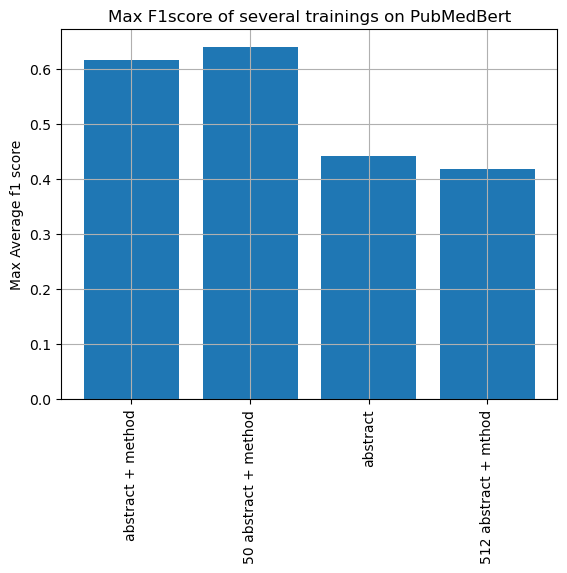

In [45]:
import matplotlib.pyplot as plt

plt.bar(columns3, pubmedbert_max)
plt.xticks(rotation=90)
plt.grid(visible=True)
plt.ylabel("Max Average f1 score")
plt.title("Max F1score of several trainings on PubMedBert")

<div class="alert alert-block alert-success ">  
<b>Inference:</b> 50 abstract + method has the highest f1score for pubmedbert
</div>

In [ ]:
learning_rates = pubmedbert_averagef1["learning rate"].unique() 
learning_rates.sort()
learning_rates

array([1.00e-07, 7.50e-07, 1.00e-06, 1.25e-06, 2.50e-06, 5.00e-06,
       1.00e-05, 2.50e-05, 3.00e-05, 5.00e-05, 7.50e-05, 8.50e-05,
       1.00e-04, 5.00e-04, 7.50e-04])

In [ ]:
pubmedbert_lr_df= get_lr_df(pubmedbert_averagef1)
pubmedbert_lr_df

,lr,512 abstract + mthod,50 abstract + method,abstract,abstract + method
0,1.000000e-07,-1.000000,-1.000000,-1.000000,-1.000000
1,7.500000e-07,-1.000000,-1.000000,-1.000000,-1.000000
2,1.000000e-06,0.033341,0.117691,-1.000000,-1.000000
3,1.250000e-06,-1.000000,-1.000000,-1.000000,-1.000000
4,2.500000e-06,-1.000000,-1.000000,-1.000000,-1.000000
5,5.000000e-06,-1.000000,0.379660,-1.000000,-1.000000
6,1.000000e-05,-1.000000,-1.000000,-1.000000,0.532262
7,2.500000e-05,-1.000000,-1.000000,-1.000000,0.000000
8,3.000000e-05,0.418254,-1.000000,-1.000000,-1.000000
9,5.000000e-05,-1.000000,0.639105,0.442014,0.614784


Text(0.5, 1.0, 'Bioelectra model performance over several learning rate')

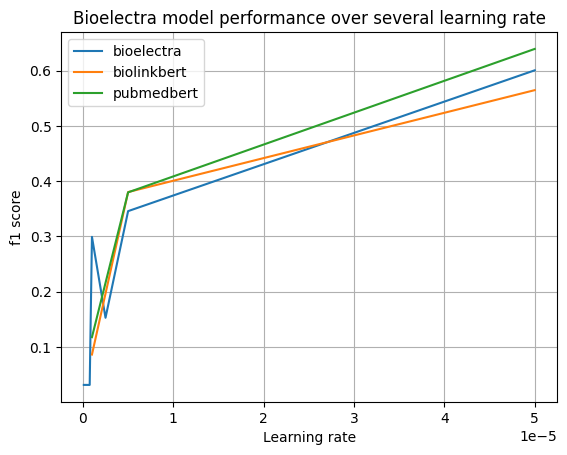

In [ ]:
import matplotlib.pyplot as plt
title = "Bioelectra model performance over several learning rate"

plt.plot(bioelectra_lr_df[bioelectra_lr_df["50 abstract + method"]>0]["lr"], 
            bioelectra_lr_df[bioelectra_lr_df["50 abstract + method"]>0]["50 abstract + method"], label = "bioelectra")
plt.plot(biolinkbert_lr_df[biolinkbert_lr_df["50 abstract + method"]>0]["lr"], 
            biolinkbert_lr_df[biolinkbert_lr_df["50 abstract + method"]>0]["50 abstract + method"], label = "biolinkbert")
plt.plot(pubmedbert_lr_df[pubmedbert_lr_df["50 abstract + method"]>0]["lr"], 
            pubmedbert_lr_df[pubmedbert_lr_df["50 abstract + method"]>0]["50 abstract + method"], label = "pubmedbert")
plt.legend()
plt.grid(True)
plt.ylabel("f1 score")
plt.xlabel("Learning rate")
plt.title(title)



In [ ]:
bioelectra_lr_df["lr"]

0     1.000000e-07
1     7.500000e-07
2     1.000000e-06
3     1.250000e-06
4     2.500000e-06
5     5.000000e-06
6     1.000000e-05
7     2.500000e-05
8     3.000000e-05
9     5.000000e-05
10    7.500000e-05
11    8.500000e-05
12    1.000000e-04
13    5.000000e-04
14    7.500000e-04
Name: lr, dtype: float64

In [ ]:
<div class="alert alert-block alert-success ">  
<b>Note:</b> F1 score increases 
</div>

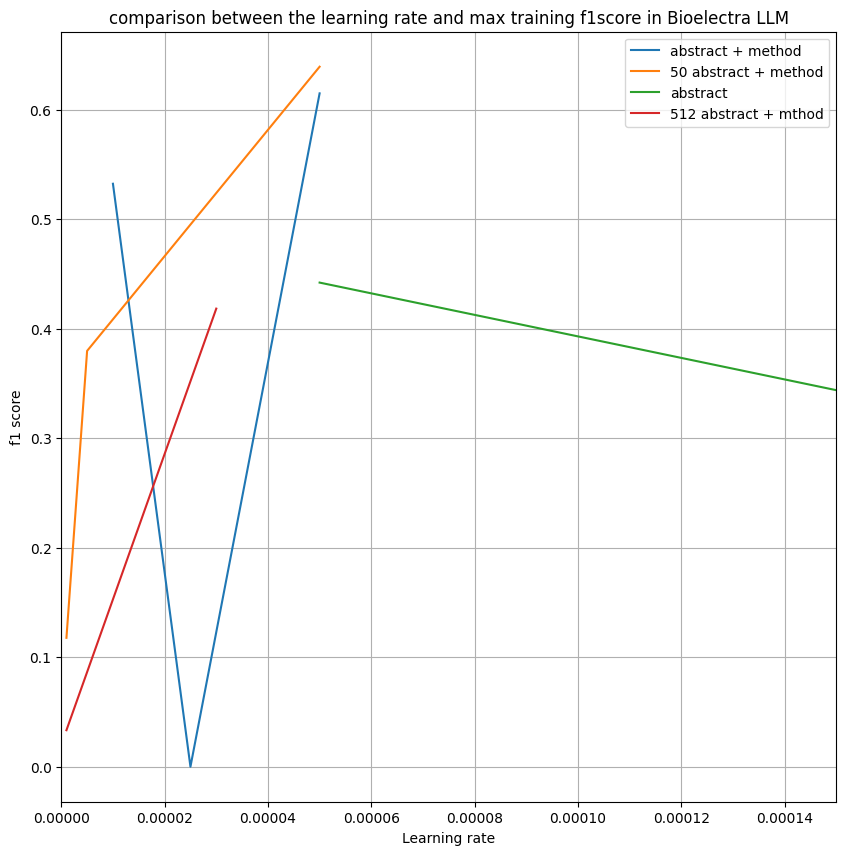

In [ ]:
import matplotlib.pyplot as plt
title = "comparison between the learning rate and max training f1score in Pubmedbert LLM"
plt.figure(figsize=(10, 10))
x = pubmedbert_lr_df[pubmedbert_lr_df["abstract + method"]!=-1]["lr"]
plt.plot(pubmedbert_lr_df[pubmedbert_lr_df["abstract + method"]!=-1]["lr"], 
            pubmedbert_lr_df[pubmedbert_lr_df["abstract + method"]!=-1]["abstract + method"], label = "abstract + method")
plt.plot(pubmedbert_lr_df[pubmedbert_lr_df["50 abstract + method"]!=-1]["lr"], 
            pubmedbert_lr_df[pubmedbert_lr_df["50 abstract + method"]!=-1]["50 abstract + method"], label = "50 abstract + method")

plt.plot(pubmedbert_lr_df[pubmedbert_lr_df["abstract"]!=-1]["lr"], 
            pubmedbert_lr_df[pubmedbert_lr_df["abstract"]!=-1]["abstract"], label = "abstract")
plt.plot(pubmedbert_lr_df[pubmedbert_lr_df["512 abstract + mthod"]!=-1]["lr"], 
            pubmedbert_lr_df[pubmedbert_lr_df["512 abstract + mthod"]!=-1]["512 abstract + mthod"], label = "512 abstract + mthod")



plt.legend()
plt.grid(True)
plt.ylabel("f1 score")
plt.xlim(0, 0.00015)
plt.xlabel("Learning rate")
plt.title(title)
plt.show()

<div class="alert alert-block alert-success ">  
<b>Success:</b> Bioelectra effective learning rate is less than 0.00015
</div>

In [ ]:
clinical_longformer_averagef1[clinical_longformer_averagef1["abstract + method"]>0]

,learning rate,weight decay,epoch,abstract + method
16,0.000050,0.0030,1,0.025129
17,0.000050,0.0030,2,0.108096
18,0.000050,0.0030,3,0.192307
19,0.000050,0.0030,4,0.133210
20,0.000050,0.0030,5,0.230112
24,0.000050,0.0001,1,0.000100
25,0.000050,0.0001,2,0.089174
26,0.000050,0.0001,3,0.145221
27,0.000050,0.0001,4,0.231678
28,0.000050,0.0001,5,0.292706


In [ ]:
def cl_get_max_list(df):# gets the columns and the maximum average f1 score in the pd.series
  
    return df["abstract + method"].max()
        

def cl_get_lr_df(df):
    
    absmeth_list = []
    
    for lr in cl_learning_rates: 
        
        x = df[df["learning rate"]==lr]

        value = cl_get_max_list(x)

        absmeth_list.append(value)
        print(f"max for {lr} is {value}")

    temp_dict = {
        "lr": cl_learning_rates,
        "abstract + meth":absmeth_list
    }
    print(temp_dict)

    return pd.DataFrame.from_dict(temp_dict)

In [ ]:
cl_learning_rates = clinical_longformer_averagef1["learning rate"].unique() 
cl_learning_rates.sort()

cl_weight_decay = clinical_longformer_averagef1["weight decay"].unique() 
cl_weight_decay.sort()


In [ ]:
cl_lr_df = cl_get_lr_df(clinical_longformer_averagef1)

max for 1e-07 is -1.0
max for 7.5e-07 is -1.0
max for 1.25e-06 is 0.00010328571428571429
max for 2.5e-06 is -1.0
max for 3e-05 is -1.0
max for 5e-05 is 0.3448514166666666
max for 7.5e-05 is -1.0
max for 8.5e-05 is 0.33855175
max for 0.0001 is -1.0
max for 0.0005 is 0.0
max for 0.00075 is -1.0
{'lr': array([1.00e-07, 7.50e-07, 1.25e-06, 2.50e-06, 3.00e-05, 5.00e-05,
       7.50e-05, 8.50e-05, 1.00e-04, 5.00e-04, 7.50e-04]), 'abstract + meth': [-1.0, -1.0, 0.00010328571428571429, -1.0, -1.0, 0.3448514166666666, -1.0, 0.33855175, -1.0, 0.0, -1.0]}


In [ ]:
cl_lr_df

,lr,abstract + meth
0,1.000000e-07,-1.000000
1,7.500000e-07,-1.000000
2,1.250000e-06,0.000103
3,2.500000e-06,-1.000000
4,3.000000e-05,-1.000000
5,5.000000e-05,0.344851
6,7.500000e-05,-1.000000
7,8.500000e-05,0.338552
8,1.000000e-04,-1.000000
9,5.000000e-04,0.000000


In [ ]:
cl_lr_df = cl_lr_df[cl_lr_df["abstract + meth"]>0]
cl_lr_df

,lr,abstract + meth
2,0.000001,0.000103
5,0.000050,0.344851
7,0.000085,0.338552


Text(0.5, 1.0, 'Best Average F1score for clinical longformer on the abstract + Method Data')

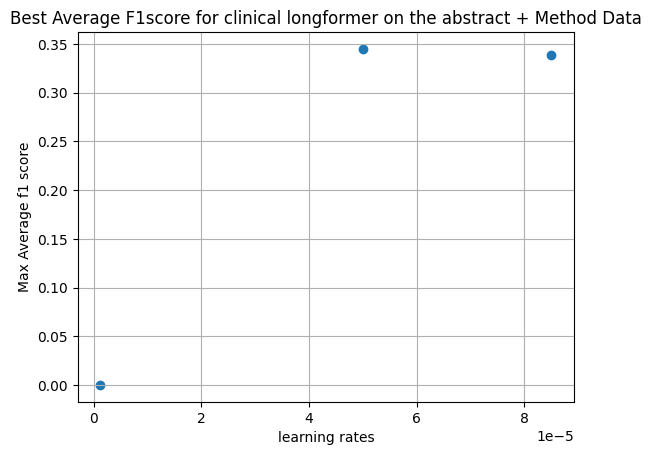

In [ ]:

x = cl_lr_df["lr"]
y = cl_lr_df["abstract + meth"]


plt.scatter(x, y)
plt.grid(visible=True)
plt.xlabel("learning rates")
plt.ylabel("Max Average f1 score")
plt.title("Best Average F1score for clinical longformer on the abstract + Method Data")

In [ ]:
cl_lr_df["lr"]

2    0.000001
5    0.000050
7    0.000085
Name: lr, dtype: float64